In [887]:
! pip install nibabel

You are using pip version 9.0.3, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [888]:
! pip install ipywidgets

You are using pip version 9.0.3, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [889]:
! pip install nipype

You are using pip version 9.0.3, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [890]:
import numpy as np
import yt
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets
import nipype

%matplotlib inline

In [891]:
img = nib.load('mprage.nii')
img_data = img.get_fdata()
img_data.shape

(256, 256, 192)

In [892]:
img_data.dtype

dtype('float64')

In [893]:
list(img.file_map)

['image']

In [894]:
img_data.itemsize

8

In [895]:
img_data.shape

(256, 256, 192)

In [896]:
img_data.max()

1060.0

In [897]:
img_data.min()

0.0

In [898]:
img_data.mean()

68.39551067352295

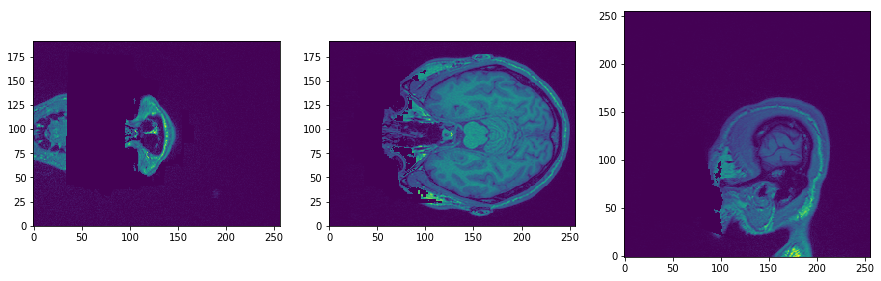

In [899]:
def show_slices(slices):
    #Function to display row of image slices
    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower")
     

slice_0 = img_data[55, :, :]
slice_1 = img_data[:, 95, :]
slice_2 = img_data[:, :, 160]
show_slices([slice_0, slice_1, slice_2])


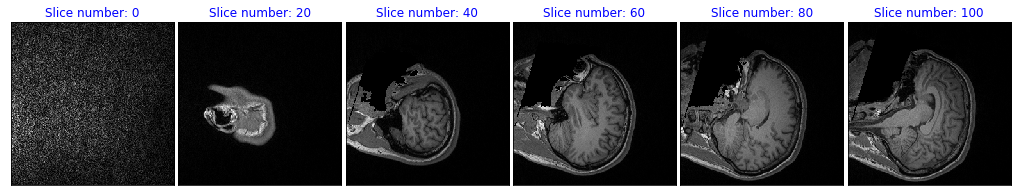

In [900]:
fig, ax = plt.subplots(1, 6, figsize=[18, 3])

n = 0
slice = 0
for _ in range(6):
    ax[n].imshow(img_data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='b')
    n += 1
    slice += 20
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [901]:
plt.rcParams["figure.dpi"] = 100
@ipywidgets.interact(slices = (0,160))
def make_slice(slices = 80):
    slice_it_up = img_data[slices,:,:]
    plt.imshow(slice_it_up, origin = "upper")

interactive(children=(IntSlider(value=80, description='slices', max=160), Output()), _dom_classes=('widget-int…

In [902]:
img_data.max()

1060.0

In [903]:
img = nib.load('mprage.nii')
img_data = img.get_fdata()
img_data.shape

(256, 256, 192)

In [904]:
# Organize the data for visualisation in the coronal plane
coronal = np.transpose(img_data, [0, 2, 1])
coronal = np.rot90(coronal, 0)

In [905]:
mask_one = coronal[:, :, 80] > 400

coronal[mask_one] = 255

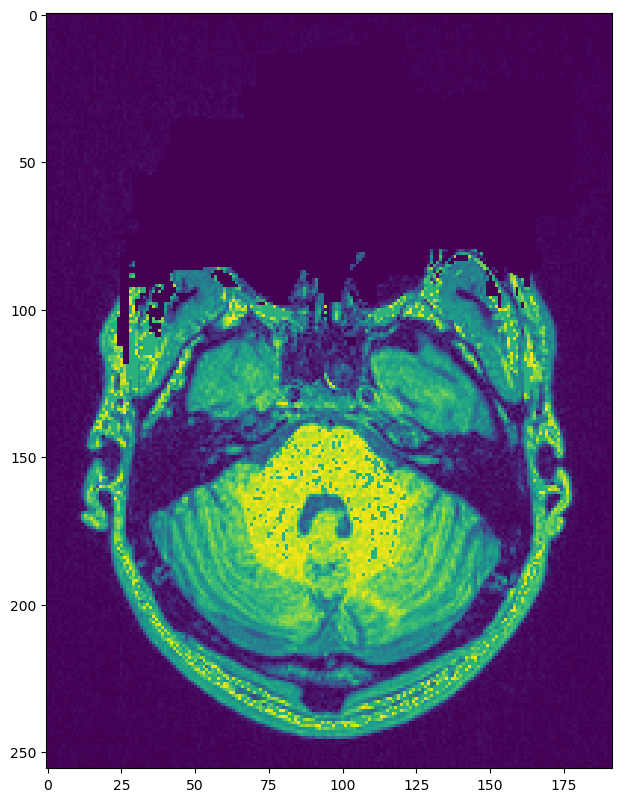

In [906]:
plt.figure(figsize = (10,10))
plt.imshow(coronal[:, :, 80])

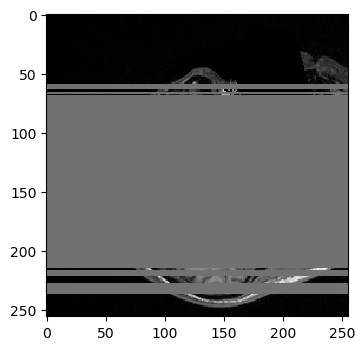

In [907]:
plt.imshow(transversal[:, :, 80], cmap='gray')

In [908]:
# Organize the data for visualisation in the sagittal plane
sagittal = np.transpose(img_data, [1,2,0])
sagittal = np.rot90(sagittal, 1)

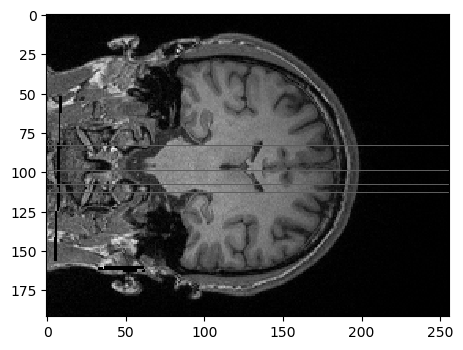

In [909]:
plt.imshow(sagittal[: ,:, 150], cmap='gray')

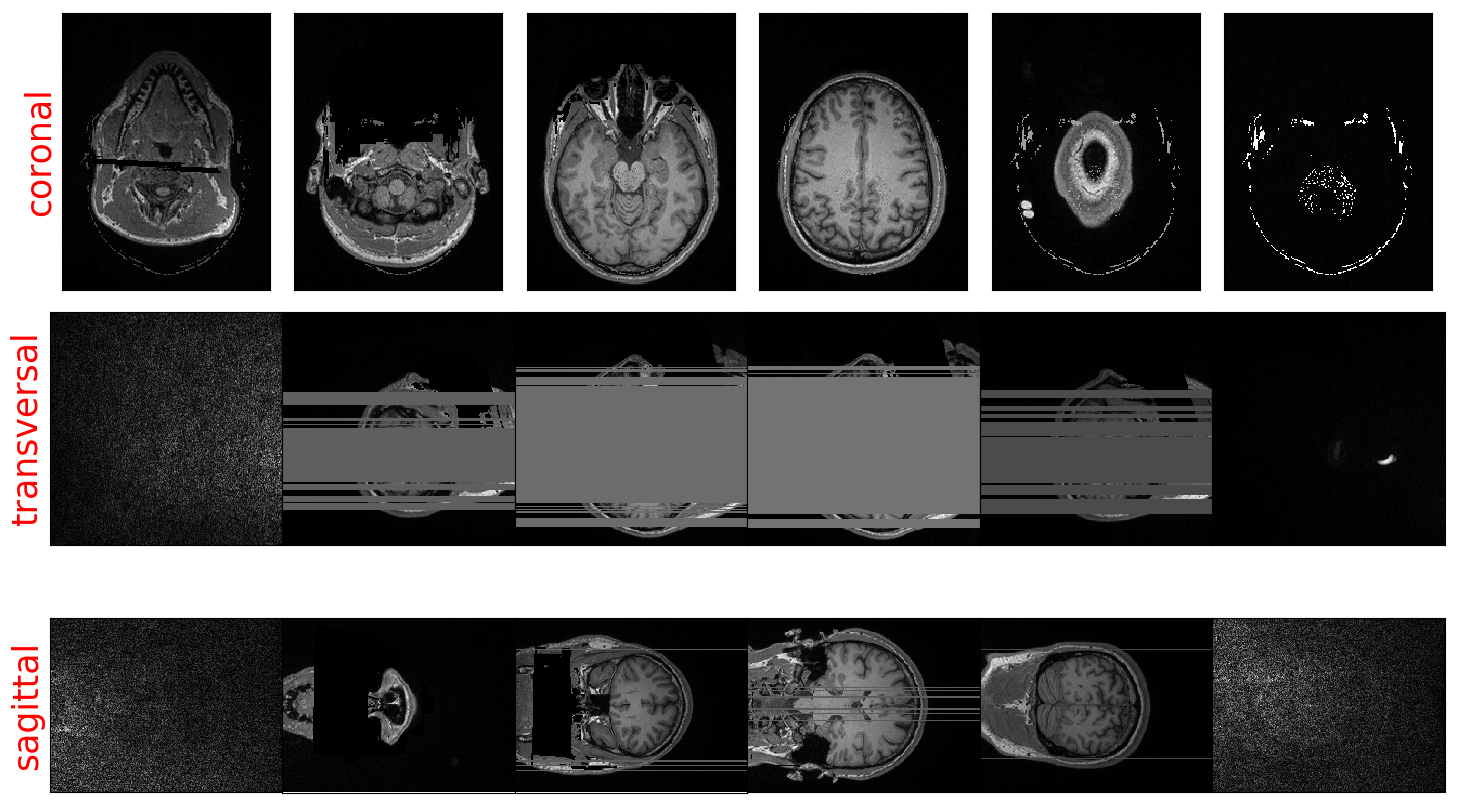

In [910]:
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 45
    
n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 35
    
n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n +=50

fig.subplots_adjust(wspace=0, hspace=0)

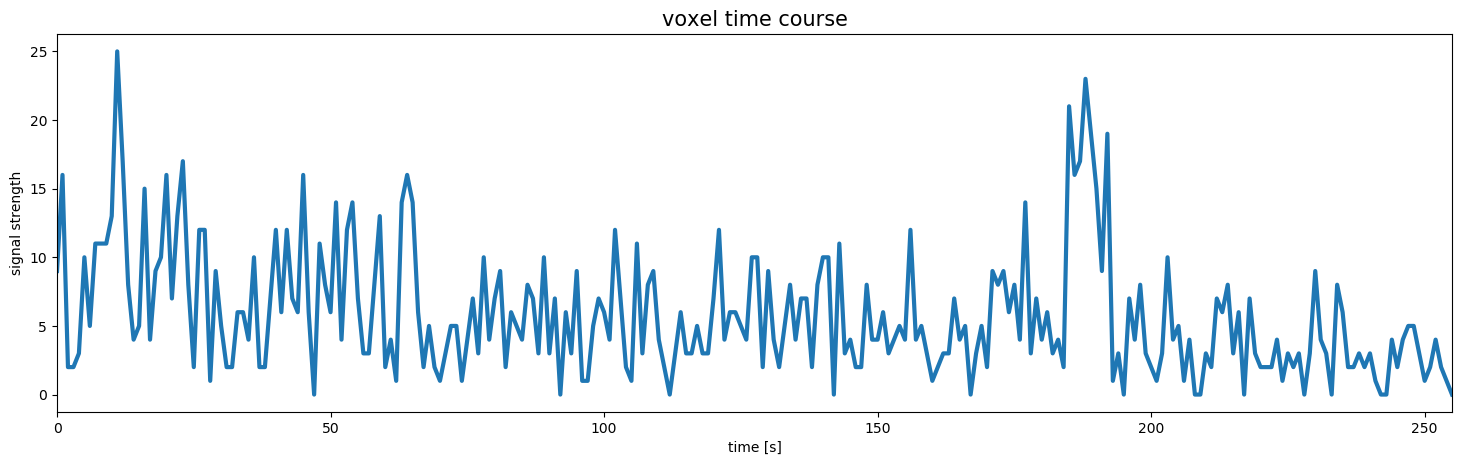

In [911]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot the timecourse of a random voxel
ax.plot(coronal[50, 30, :], lw= 3)
ax.set_xlim([0, coronal.shape[2]-1])
ax.set_xlabel('time [s]', fontsize=10)
ax.set_ylabel('signal strength', fontsize=10)
ax.set_title('voxel time course', fontsize=15)
ax.tick_params(labelsize=10)

plt.show()

In [912]:
# Rearrange and reshape data for export
data_all = np.transpose(data_all, [3, 2, 1, 0])
data_all = np.reshape(data_all, [n_slice, y_size*x_size, n_volumes])

# Check if output path exists, if not create it.
if os.path.exists('./fMRI_data/csv_data') == False:
    os.mkdir('./fMRI_data/csv_data')

# Export each slice as a .csv file 
n = 0
for export in data_all:

    save_file = 'slice_{}.csv'.format(n)
    save_path = './fMRI_data/csv_data/{}'.format(save_file)
    pd.DataFrame(export).to_csv(save_path, header=False, index=False)
    n += 1

NameError: name 'data_all' is not defined

In [ ]:
# adjust to this study design

block_design    = ['fixation', 'event']
block_size      = 2
block_RT        = 7
block_total     = 9
block_length    = block_size*block_RT
acq_num         = block_size*block_total
data_time       = block_length*block_total
data_time_vol   = np.arange(acq_num)*block_RT
x_size = 33
y_size = 33

In [ ]:
np.tile?

In [ ]:
constant = np.ones(acq_num)
fixation     = np.zeros(block_size)
event     = np.ones(block_size)
block    = np.concatenate((fixation, event), axis=0)
predicted_response = np.tile(block, int(block_total/2))
design_matrix = np.array((constant, predicted_response))


In [ ]:
# Import/slice the data of one slice
data = coronal[:30:]

# Reshape the data to 2 spatial and 1 temporal dimensions
data_ordered = data.reshape(x_size, y_size, acq_num)

# Calculate the correlation coefficients
c = np.corrcoef(design_matrix[1,:], data)[1:,0]

# Identify the voxel with the highest correlation coefficient
strongest_correlated = data[c.argmax(),:]

In [ ]:
avg = []
for i in img_data:
    avg.append(np.mean(i))
    new = np.array(avg)
print(new.shape)


In [ ]:
np.corrcoef(new)

In [ ]:
new.max()

In [ ]:
file = open('run_01_spmdef.txt')

In [ ]:
trials = file.readlines()
#print(trials)

for i in trials:
    print(i)

### T1 Weighted Image (Face Removed)

In [ ]:
ds = yt.load_uniform_grid({'image':img_data},[256, 256, 192],length_unit = yt.units.mm, 
                     bbox = np.array([[0.,10],[0.,10], [0.,10]]))

In [ ]:
dd = ds.all_data()
dd['image']

In [ ]:
yt.SlicePlot(ds, fields = "image", axis = 'z')

In [ ]:
ds_mean = ds.r[:].mean("image", axis ='x').plot()

### Trying EPI Image (Echo-Planar Imaging)

In [ ]:
epi = nib.load("fMR09029-0003-00003-000003-01.nii")

In [ ]:
epi_data = epi.get_fdata()

In [ ]:
epi_data.shape

In [ ]:
epi_data.dtype

In [ ]:
list(epi.file_map)

In [ ]:
def show_slices(slices):
    #Function to display row of image slices
    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower")
     

slice_0 = epi_data[10, :, :]
slice_1 = epi_data[:, 40, :]
slice_2 = epi_data[:, :, 20]
show_slices([slice_0, slice_1, slice_2])

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=[18, 3])

n = 0
slice = 0
for _ in range(6):
    ax[n].imshow(epi_data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='b')
    n += 1
    slice += 5
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
ds_epi = yt.load_uniform_grid({'image': epi_data},[64, 64, 33],length_unit = yt.units.mm, 
                     bbox = np.array([[0.,10],[0.,10], [0.,10]]))

In [ ]:
yt.SlicePlot(ds_epi, fields = "image", axis = 'x')

In [ ]:
data = epi_data[19:20]
len(data)
data.shape
#data

In [ ]:
print(x_size)
print(y_size)
print(acq_num)

In [ ]:
print(design_matrix)

In [ ]:
# Import/slice the data of one slice
data = epi_data[:]

# Reshape the data to 2 spatial and 1 temporal dimensions
data_ordered = data.reshape(x_size, y_size, acq_num)

# Calculate the correlation coefficients
c = np.corrcoef(design_matrix[1,:], data)[1:,0]

# Identify the voxel with the highest correlation coefficient
strongest_correlated = data[c.argmax(),:]

### Diffusion Weighted Image - 4 Dimensions

In [ ]:
dwi = nib.load("./dwi.nii")

In [ ]:
dwi_data = dwi.get_fdata()

In [ ]:
dwi_data.shape

In [ ]:
dwi_new = np.rot90(dwi_data.squeeze(), 1)

In [ ]:
dwi_new.shape

Plotting 4D data - matplotlib? yt?